###### Data source:http://yann.lecun.com/exdb/mnist/; tutorial:https://www.bilibili.com/video/BV14J411X7Bb?p=6

In [5]:
import sys
!conda install --yes --prefix {sys.prefix} keras

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\admin\anaconda3\envs\k1py37ml

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.11.0             |     pyhd3eb1b0_1         103 KB
    gast-0.4.0                 |             py_0          15 KB
    keras-2.3.1                |                0           6 KB
    keras-base-2.3.1           |           py37_0         485 KB
    libmklml-2019.0.5          |       haa95532_0        17.5 MB
    tensorboard-1.14.0         |   py37he3c9ec2_0         3.1 MB
    tensorflow-1

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from keras.datasets import mnist

Using TensorFlow backend.


In [8]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

print("Training has {} samples.".format(len(X_train)))
print("Testing has {} samples.".format(len(X_test)))

Training has 60000 samples.
Testing has 10000 samples.


In [10]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#### Data visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    #用来正常显示负号

In [15]:
X_train[7].shape

(28, 28)

In [16]:
X_train[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

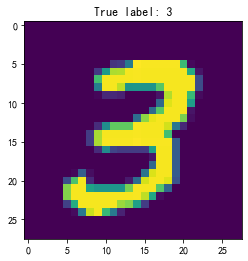

In [17]:
# visualize one of the image
plt.imshow(X_train[7])
plt.title('Real label: '+str(y_train[7]))
plt.show()

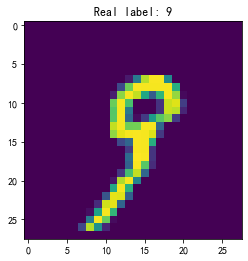

In [18]:
plt.imshow(X_train[19])
plt.title('Real label: '+str(y_train[19]))
plt.show()

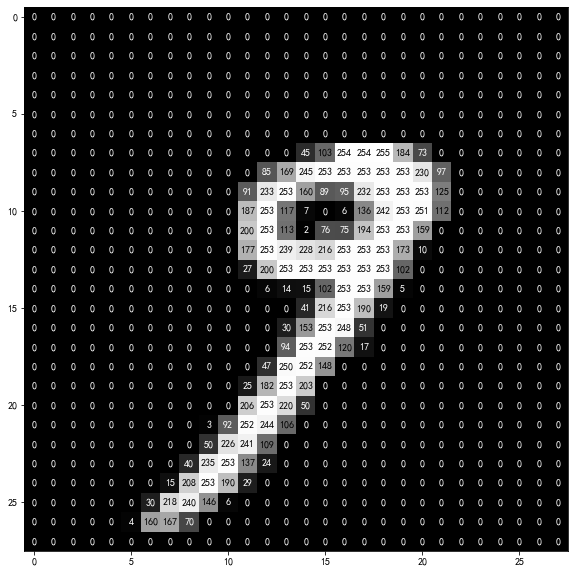

In [22]:
# Heat map
def visualize_input(img,ax):
    # 先绘制数字的大图，然后对784个像素逐一标注灰度值
    ax.imshow(img,cmap='gray')
    width,height=img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                       horizontalalignment='center',verticalalignment='center',
                       color='white' if img[x][y]<thresh else 'black')
            

i=33
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
visualize_input(X_train[i],ax)

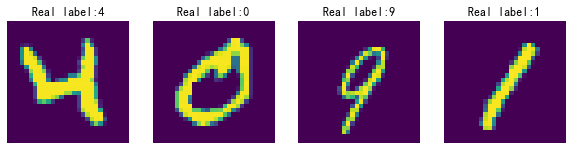

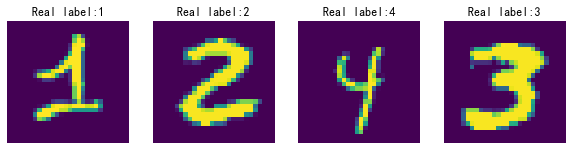

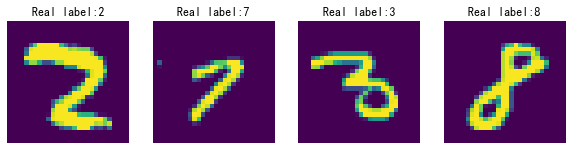

In [25]:
import matplotlib.cm as cm

# display several images
for i in range(20,32):
    plt.style.use({'figure.figsize':(10,10)}) # set fig size
    plt.subplot(1,4,i%4+1)
    plt.imshow(X_train[i])
    title='Real label:{}'.format(str(y_train[i]))
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    if i%4 ==3:
        plt.show()

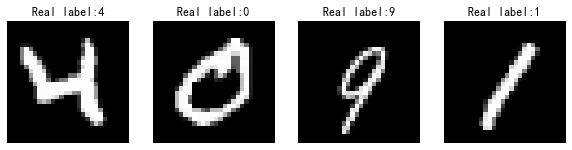

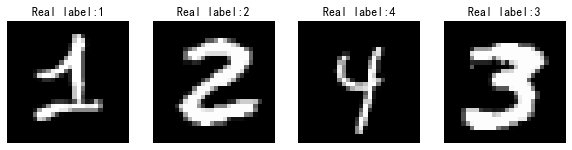

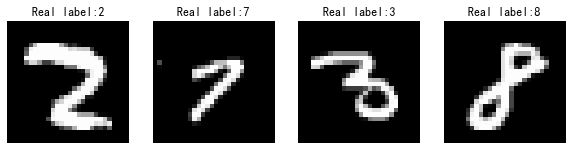

In [27]:
# grayscale version
# display several images
for i in range(20,32):
    plt.style.use({'figure.figsize':(10,10)}) # set fig size
    plt.subplot(1,4,i%4+1)
    plt.imshow(X_train[i],cmap='gray')
    title='Real label:{}'.format(str(y_train[i]))
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    if i%4 ==3:
        plt.show()

#### Preprocess - normalization 归一化

In [28]:
# [0,255] --> [0,1]
# NN对输入数据幅度敏感,进行数据归一化预处理可以让后续NN模型收敛更快，效果更好
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Preprocess-label to one-hot code 标签独热向量编码

In [32]:
# 训练集标签
y_train[:6]
"""
原始数据标签为整数形式，但在手写数字分类场景中，数字9没有比1大的含义。
应转换标签以防止数字大小关系被考虑进模型中。此处采用独热向量编码。
在构造损失函数时，用独热向量编码计算交叉熵损失函数
"""

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [34]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train,10) # 10为维度
y_test = np_utils.to_categorical(y_test,10)

# https://keras-cn.readthedocs.io/en/latest/utils/

In [35]:
y_train[:6]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Multilayer Perceptron Neural Networks 构建MLP多层感知机神经网络

In [38]:
"""
Dense 密集层：即全连接层
Droupout 丢弃层：防止过拟合
Flatten： 将28*28的图像拉平为784维长向量
https://keras.io/zh/layers/core/
"""
X_train.shape[1:]

(28, 28)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28)))

# 序贯模型: 多个网络层的线性堆叠

#512个神经远的全连接神经网络，激活函数为relu,Droupout率为0.2
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2)) # 随机掐死20%神经元

#512个神经元的全连接神经网络，激活函数为relu，Dropout率为0.2
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

# 输出层，10个神经元，softmax输出，对应图像为10给数字的概率
model.add(Dense(10,activation='softmax'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [41]:
# 打包模型，损失函数为多分类交叉熵损失函数，梯度下降优化器为emsprop，训练过程中输出准确率信息
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [42]:
# 模型训练之前，在测试集上进行评估
model.evaluate(X_test,y_test,verbose=1)
# 交叉熵很大，准确率很低


10000/10000 [==============================] - 1s 105us/step


[2.319455266571045, 0.07829999923706055]

### Start Training

In [45]:
"""
每步传入128个样本，训练10轮，即完整遍历10遍训练集，每轮训练之后在验证集上进行测试。
验证集为1/5原始数据。

使用ModelCheckpoint及时存储验证集上准确率最高的最优模型，
存储为当前目录下的"mnist.model.best.hdf5"文件。
早停可防止过拟合
http://keras.io/callbacks/#modelcheckpoint
"""

from keras.callbacks import ModelCheckpoint

checkpointer  = ModelCheckpoint(filepath='mnist.model.best.hdf5',verbose=1,
                               save_best_only=True)

hist  = model.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.2,
                 callbacks=[checkpointer],verbose=1,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.2705 - accuracy: 0.9168 - val_loss: 0.1245 - val_accuracy: 0.9620

Epoch 00001: val_loss improved from inf to 0.12452, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.1095 - accuracy: 0.9656 - val_loss: 0.0988 - val_accuracy: 0.9708

Epoch 00002: val_loss improved from 0.12452 to 0.09884, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 10s 207us/step - loss: 0.0791 - accuracy: 0.9756 - val_loss: 0.0915 - val_accuracy: 0.9775

Epoch 00003: val_loss improved from 0.09884 to 0.09153, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 12s 253us/step - loss: 0.0605 - accuracy: 0.9820 - val_loss: 0.0895 - val_accuracy: 0.9763

Epoch 00004: val_loss improved from 0.09153 to 0.08949, saving model to mn

#### Visualize training process info 可视化训练过程的信息

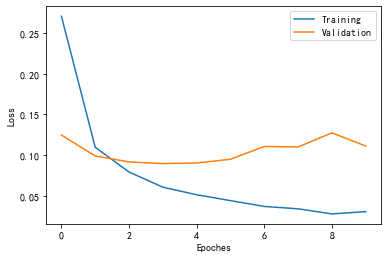

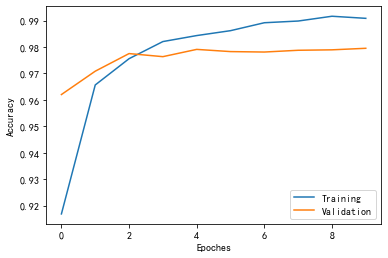

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training','Validation'])
    
    plt.figure()
    plt.xlabel('Epoches')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training','Validation'],loc='lower right')
    plt.show()
    
plot_history(hist)

In [58]:
# Load best accuracy model
model.load_weights("mnist.model.best.hdf5")

#### Evaluate Model on testing dataset 在测试集上评估模型

In [62]:
model.evaluate(X_test,y_test,verbose=0)

[0.07616585766882636, 0.9785000085830688]

### Make Predictions on some samples 对一些样本进行预测

In [63]:
i=77
img_test = X_test[i].reshape(-1,28,28) 
# 由于训练时没批128，预测时传图片也要加入批次
# 此处-1 表示每一批一张
prediction = model.predict(img_test)[0]

In [64]:
prediction

array([3.5590624e-08, 5.4288612e-05, 9.9993944e-01, 1.0479383e-06,
       1.4334575e-10, 4.2658330e-09, 5.6502114e-09, 4.4841913e-06,
       6.3248177e-07, 1.0780903e-09], dtype=float32)

In [65]:
img_test.shape

(1, 28, 28)

In [66]:
y_test[i]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [68]:
import numpy as np
np.argmax(prediction)

2

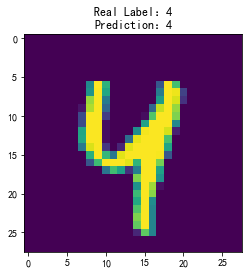

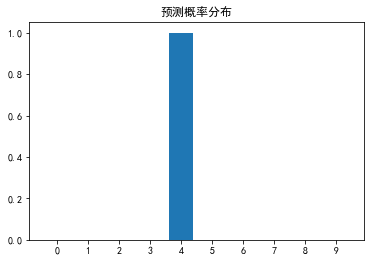

In [70]:
# 对测试机中索引为i的图像进行分类及结果可视化
i=42

plt.imshow(X_test[i])
img_test = X_test[i].reshape(-1,28,28)
prediction = model.predict(img_test)[0]

title='Real Label：{}\nPrediction：{}'.format(np.argmax(y_test[i]),np.argmax(prediction))
plt.title(title)
plt.show()

plt.bar(range(10),prediction)
plt.title('预测概率分布')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()